In [9]:
from datasets import load_dataset
from collections import Counter
from matplotlib import pyplot as plt


In [2]:
narrative_data = (
    load_dataset("narrativeqa", split="train+validation+test")
    .select_columns(["document", "question"])
    .map(
        lambda x: {
            "document": x["document"]["summary"]["text"],
            "question": x["question"]["text"],
        }
    )
    .rename_columns({"document": "source", "question": "target"})
)

C:\Users\omarz\Documents\University\mmqg\.venv\lib\site-packages\datasets\load.py:1429: FutureWarning: The repository for narrativeqa contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/narrativeqa
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
dataset_count = narrative_data.shape[0]
dataset_count

46765

In [4]:
def add_unigram(example):
    example["unigram"] = " ".join(example["target"].split(" ")[:1])
    return example

leading_unigram = narrative_data.map(add_unigram)

unigram_leading_word_counts = Counter(leading_unigram["unigram"])

most_common_bigram_leading_words = unigram_leading_word_counts.most_common(10)
print(f"{'Unigram': <20}{'Percentage': <10}")
print("-" * 30)
for word, count in most_common_bigram_leading_words:
    p = count / dataset_count * 100
    print(f"{word: <20}{p:.2f}%")


Map:   0%|          | 0/46765 [00:00<?, ? examples/s]

Unigram             Percentage
------------------------------
What                38.01%
Who                 23.14%
How                 10.39%
Why                 9.74%
Where               7.46%
Which               2.17%
When                1.63%
In                  1.15%
After               0.60%
Whose               0.55%


## Most Frequent Leading Bigram

In [5]:
from collections import Counter

def add_bigram(example):
    example["bigram"] = " ".join(example["target"].split(" ")[:2])
    return example

leading_bigram = narrative_data.map(add_bigram)

bigram_leading_word_counts = Counter(leading_bigram["bigram"])

most_common_bigram_leading_words = bigram_leading_word_counts.most_common(10)
print(f"{'Bigram': <20}{'Percentage': <10}")
print("-" * 30)
for word, count in most_common_bigram_leading_words:
    p = count/dataset_count*100
    print(f"{word: <20}{p:.2f}%")

Map:   0%|          | 0/46765 [00:00<?, ? examples/s]

Bigram              Percentage
------------------------------
What is             8.69%
What does           8.10%
Who is              6.69%
Who does            4.05%
Why does            3.93%
How does            3.81%
Where does          3.06%
What did            2.62%
What was            2.44%
Why did             2.23%


## Distribution of Target and Source Length

In [6]:
from transformers import T5Tokenizer, BartTokenizer


bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
t5_tokenizer = T5Tokenizer.from_pretrained('t5-small')


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
def add_target_tokens(example):
    example["bart"] = len(bart_tokenizer.tokenize(example["target"]))
    example["t5"] = len(t5_tokenizer.tokenize(example["target"]))
    return example

question_length = narrative_data.map(add_target_tokens)
question_length[0]

Map:   0%|          | 0/46765 [00:00<?, ? examples/s]

{'source': " At Madeline Hall, an old mansion-house near Southampton belonging to the wealthy de Versely family, lives an elderly spinster Miss Delmar, the aunt of the earl de Versely and Captain Delmar. Miss Delmar invites Arabella Mason, the daughter of a deceased, well-liked steward to stay with her as a lower-class guest in the house. Captain Delmar is known to visit his aunt at Madeline Hall frequently, accompanied by his valet Ben Keene, who is also a private marine. Captain Delmar eventually suggests that Ben should propose to Arabella, and the two marry in secret, to the frustration of Miss Delmar and Arabella's mother. The captain is able to smooth over the situation with his aunt, even after it is discovered that Arabella was six months pregnant at the time of the marriage. She later gives birth to a boy, who takes the Captain's Christian name and Ben's surname--the titular Percival Keene.\nThe family moves to Chatham, after Ben is ordered back with his detachment. Arabella o

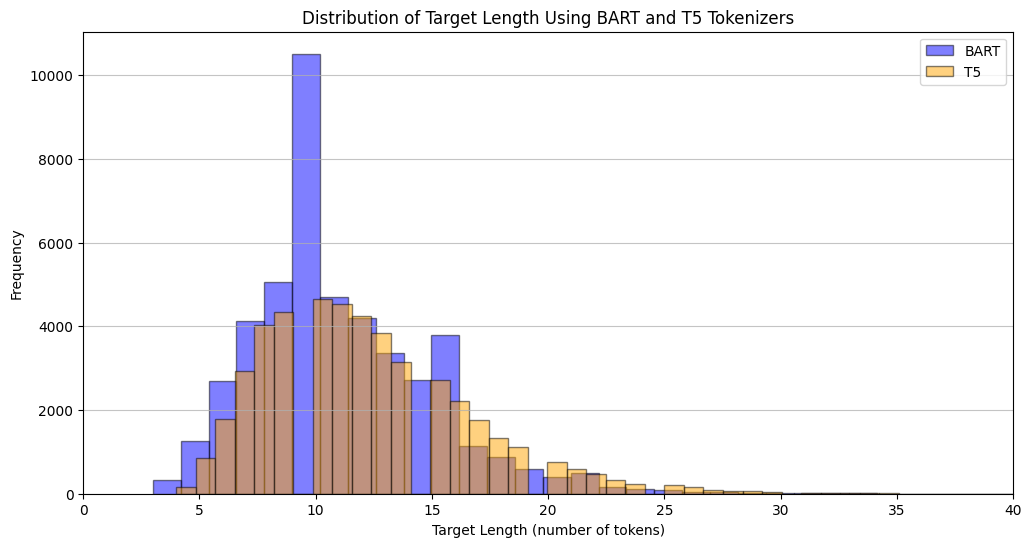

In [39]:
plt.figure(figsize=(12, 6))
plt.hist(question_length["bart"], bins=1000, alpha=0.5, label='BART', color='blue', edgecolor='black')
plt.hist(question_length["t5"], bins=50, alpha=0.5, label='T5', color='orange', edgecolor='black')
plt.xlim(0, 40)
plt.title('Distribution of Target Length Using BART and T5 Tokenizers')
plt.xlabel('Target Length (number of tokens)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [11]:
def add_source_tokens(example):
    example["bart"] = len(bart_tokenizer.tokenize(example["source"]))
    example["t5"] = len(t5_tokenizer.tokenize(example["source"]))
    return example

source_length = narrative_data.map(add_source_tokens)
source_length[0]

Map:   0%|          | 0/46765 [00:00<?, ? examples/s]

{'source': " At Madeline Hall, an old mansion-house near Southampton belonging to the wealthy de Versely family, lives an elderly spinster Miss Delmar, the aunt of the earl de Versely and Captain Delmar. Miss Delmar invites Arabella Mason, the daughter of a deceased, well-liked steward to stay with her as a lower-class guest in the house. Captain Delmar is known to visit his aunt at Madeline Hall frequently, accompanied by his valet Ben Keene, who is also a private marine. Captain Delmar eventually suggests that Ben should propose to Arabella, and the two marry in secret, to the frustration of Miss Delmar and Arabella's mother. The captain is able to smooth over the situation with his aunt, even after it is discovered that Arabella was six months pregnant at the time of the marriage. She later gives birth to a boy, who takes the Captain's Christian name and Ben's surname--the titular Percival Keene.\nThe family moves to Chatham, after Ben is ordered back with his detachment. Arabella o

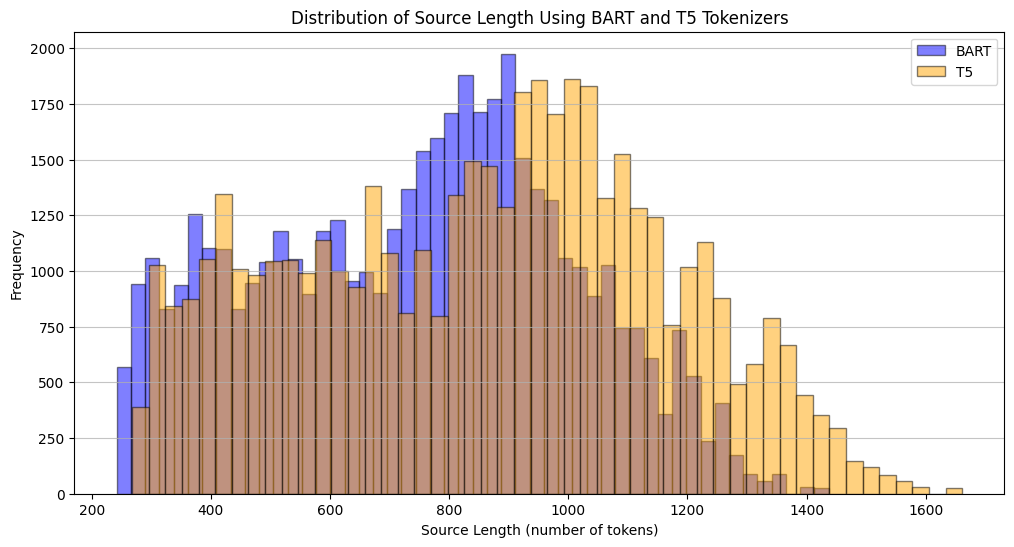

In [40]:
plt.figure(figsize=(12, 6))
plt.hist(source_length["bart"], bins=50, alpha=0.5, label='BART', color='blue', edgecolor='black')
plt.hist(source_length["t5"], bins=50, alpha=0.5, label='T5', color='orange', edgecolor='black')
plt.title('Distribution of Source Length Using BART and T5 Tokenizers')
plt.xlabel('Source Length (number of tokens)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()